In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st 
import statistics
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
import pylab
import plotly.express as px
from tabulate import tabulate

In [ ]:
data = pd.read_csv('/content/Factors affecting sleep.csv')
data['lecture_pattern'] = data['How do you watch lectures?']
data['assgn_pattern'] = data['How do you submit assignments?']
data['acad_screen_time'] = data['How much time do you spend on screen for academic purposes, programming or work related to that?']
data['sleep_hrs'] = data['How much sleep do you get in a day?']

data.drop(['How do you watch lectures?', 'How do you submit assignments?', 
         'How much time do you spend on screen for academic purposes, programming or work related to that?',
         'How much sleep do you get in a day?'], axis=1, inplace=True)

df = pd.DataFrame(data, columns=['lecture_pattern', 'assgn_pattern', 'acad_screen_time', 'sleep_hrs'])

In [ ]:
df['sleep_hrs'].replace(["6-7 hrs", "more than 8 hours","4-5 hrs","5-6 hrs","less than 4 hours"],
                [7,8,5,6,4], regex=True, inplace=True)
df = df.replace(['Binge watch lecture recordings/Read slides','Watch lectures/Read slides on regular basis, but recordings',
                  'Watch lecutures live','Watch live lectures and recordings/read slides too'], 
                 ["binge watching or reading", "regular but recordings","live", "both live and recordings"], regex=True)

In [ ]:
df['acad_screen_time-n'] = pd.DataFrame(df['acad_screen_time'].replace(["1-2 hrs", "2-3 hrs","4-5 hrs", "6 or more hours"],
                [1.5,2.5,4.5,6.5], regex=True))
df['sleep_hrs-n'] = pd.DataFrame(np.zeros(128))
df['acad_screen_time-nr'] = pd.DataFrame(np.zeros(128))
df['students'] = pd.DataFrame(np.ones(128))

In [ ]:
for i in range(len(df)):
    np.random.seed(2*i)
    p = df['acad_screen_time-n'][i]
    if (p < 5):
        df['acad_screen_time-nr'][i] = np.random.uniform(p-0.5, p+0.5)
    else:
        df['acad_screen_time-nr'][i] = np.random.uniform(p-0.75, p+0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in range(len(df)):
    np.random.seed(i+5)
    p = df['sleep_hrs'][i]
    if (p <= 7):
        df['sleep_hrs-n'][i] = np.random.uniform(p-0.5, p+0.5)
    else:
        df['sleep_hrs-n'][i] = np.random.uniform(p-0.5, p+0.75)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df0 = df.loc[df['lecture_pattern']=='binge watching or reading']
df1 = df.loc[df['lecture_pattern']=='regular but recordings']
df2 = df.loc[df['lecture_pattern']=='live']
df3 = df.loc[df['lecture_pattern']=='both live and recordings']
df

,lecture_pattern,assgn_pattern,acad_screen_time,sleep_hrs,acad_screen_time-n,sleep_hrs-n,acad_screen_time-nr,students
0,binge watching or reading,A day or more before deadline,4-5 hrs,7,4.5,6.721993,4.548814,1.0
1,live,On the last day of deadline,4-5 hrs,7,4.5,7.392860,4.435995,1.0
2,binge watching or reading,On the last day of deadline,4-5 hrs,7,4.5,6.576308,4.967030,1.0
3,live,On the last day of deadline,2-3 hrs,8,2.5,8.591787,2.892860,1.0
4,binge watching or reading,Last minute,6 or more hours,7,6.5,6.510374,6.841787,1.0
...,...,...,...,...,...,...,...,...
125,both live and recordings,On the last day of deadline,6 or more hours,7,6.5,6.641630,6.018474,1.0
126,both live and recordings,On the last day of deadline,4-5 hrs,8,4.5,8.312692,4.005413,1.0
127,regular but recordings,A day or more before deadline,2-3 hrs,8,2.5,8.476130,2.512062,1.0
128,regular but recordings,A day or more before deadline,4-5 hrs,7,4.5,6.919509,4.045784,NaN


In [ ]:
dfx = df.loc[df['assgn_pattern']=='A day or more before deadline']
dfy = df.loc[df['assgn_pattern']=='On the last day of deadline']
dfz = df.loc[df['assgn_pattern']=='Last minute']

In [ ]:
# df0.describe()
df0['binge watching or reading'] = pd.DataFrame(df0['sleep_hrs-n'])
df1['regular but recordings'] = pd.DataFrame(df1['sleep_hrs-n'])
df2['live'] = pd.DataFrame(df2['sleep_hrs-n'])
df3['both live and recordings'] = pd.DataFrame(df3['sleep_hrs-n'])
dff=pd.concat([df0['binge watching or reading'].describe() ,df1['regular but recordings'].describe(), df2['live'].describe(), df3['both live and recordings'].describe()
              ],axis=1)
# print(tabulate(dff, headers = 'keys', tablefmt = 'fancy_grid'))
display(dff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,binge watching or reading,regular but recordings,live,both live and recordings
count,65.000000,19.000000,19.000000,27.000000
mean,6.768753,7.060560,6.993222,6.976894
std,0.995108,0.793951,0.848921,0.614738
min,3.653054,5.605172,5.702607,5.334842
25%,6.533755,6.805897,6.378027,6.671317
50%,6.874540,7.023833,7.045851,6.951411
75%,7.351985,7.496349,7.375875,7.161050
max,8.587655,8.476130,8.591787,8.410634


In [ ]:
dfx['A day or more before deadline'] = pd.DataFrame(dfx['sleep_hrs-n'])
dfy['On the last day of deadline'] = pd.DataFrame(dfy['sleep_hrs-n'])
dfz['Last minute'] = pd.DataFrame(dfz['sleep_hrs-n'])
dfg=pd.concat([dfx['A day or more before deadline'].describe() ,dfy['On the last day of deadline'].describe(), dfz['Last minute'].describe()
              ],axis=1)
# print(tabulate(dfg, headers = 'keys', tablefmt = 'fancy_grid'))
display(dfg)
dfx

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,A day or more before deadline,On the last day of deadline,Last minute
count,15.000000,79.000000,36.000000
mean,6.817429,6.843700,7.012588
std,0.991628,0.738656,1.099612
min,4.616059,4.611331,3.653054
25%,6.503229,6.599587,6.690900
50%,6.907687,6.958055,7.123132
75%,7.202889,7.251794,7.738544
max,8.583296,8.591787,8.587655


,lecture_pattern,assgn_pattern,acad_screen_time,sleep_hrs,acad_screen_time-n,sleep_hrs-n,acad_screen_time-nr,students,A day or more before deadline
0,binge watching or reading,A day or more before deadline,4-5 hrs,7,4.5,6.721993,4.548814,1.0,6.721993
27,live,A day or more before deadline,2-3 hrs,7,2.5,7.358889,2.420183,1.0,7.358889
34,both live and recordings,A day or more before deadline,4-5 hrs,7,4.5,7.046889,4.259371,1.0,7.046889
35,both live and recordings,A day or more before deadline,1-2 hrs,7,1.5,6.907687,1.927481,1.0,6.907687
49,regular but recordings,A day or more before deadline,4-5 hrs,7,4.5,6.920183,4.732267,1.0,6.920183
52,both live and recordings,A day or more before deadline,6 or more hours,7,6.5,6.587350,5.934901,1.0,6.587350
61,regular but recordings,A day or more before deadline,1-2 hrs,6,1.5,5.654288,1.156992,1.0,5.654288
67,both live and recordings,A day or more before deadline,6 or more hours,7,6.5,6.606738,6.764255,1.0,6.606738
72,live,A day or more before deadline,6 or more hours,6,6.5,6.419109,5.866680,1.0,6.419109
74,both live and recordings,A day or more before deadline,6 or more hours,6,6.5,6.000668,6.469257,1.0,6.000668


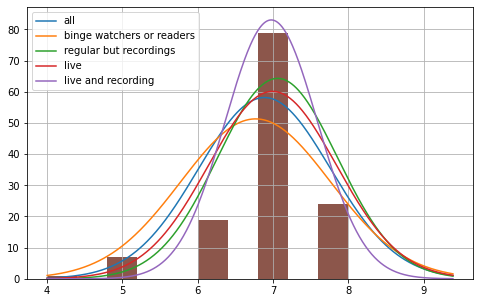

In [ ]:
plt.figure(figsize=(8, 5))
x_axis = np.arange(4, 9.4, 0.01)
plt.plot(x_axis, 128*st.norm.pdf(x_axis, df["sleep_hrs-n"].mean(), df["sleep_hrs-n"].std()),label='all')
plt.plot(x_axis, 128*st.norm.pdf(x_axis, df0["sleep_hrs-n"].mean(), df0["sleep_hrs-n"].std()),label='binge watchers or readers')
plt.plot(x_axis, 128*st.norm.pdf(x_axis, df1["sleep_hrs-n"].mean(), df1["sleep_hrs-n"].std()),label='regular but recordings')
plt.plot(x_axis, 128*st.norm.pdf(x_axis, df2["sleep_hrs-n"].mean(), df2["sleep_hrs-n"].std()),label='live')
plt.plot(x_axis, 128*st.norm.pdf(x_axis, df3["sleep_hrs-n"].mean(), df3["sleep_hrs-n"].std()),label='live and recording')
#plt.figure(figsize=(10,8))
df['sleep_hrs'].hist()
plt.legend()
plt.show()

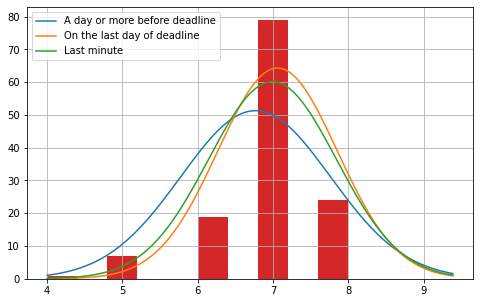

In [ ]:
plt.figure(figsize=(8, 5))
x_axis = np.arange(4, 9.4, 0.01)
#plt.plot(x_axis, 127*st.norm.pdf(x_axis, df["sleep_hrs"].mean(), df["sleep_hrs"].std()),label='all')
plt.plot(x_axis, 128*st.norm.pdf(x_axis, df0["sleep_hrs-n"].mean(), df0["sleep_hrs-n"].std()),label='A day or more before deadline')
plt.plot(x_axis, 128*st.norm.pdf(x_axis, df1["sleep_hrs-n"].mean(), df1["sleep_hrs-n"].std()),label='On the last day of deadline')
plt.plot(x_axis, 128*st.norm.pdf(x_axis, df2["sleep_hrs-n"].mean(), df2["sleep_hrs-n"].std()),label='Last minute')
#plt.figure(figsize=(10,8))
df['sleep_hrs'].hist()
plt.legend()
plt.show()

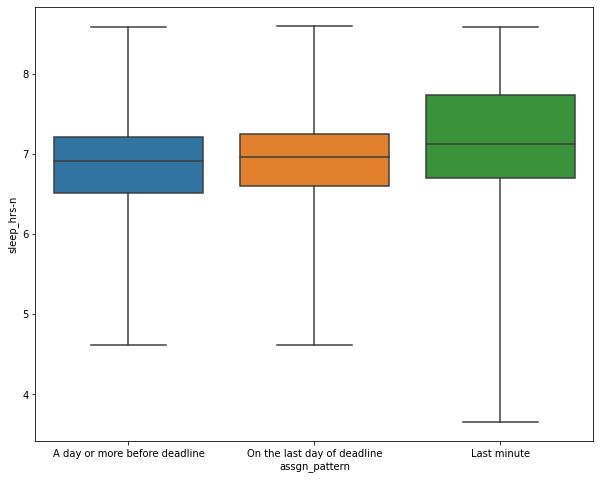

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y="sleep_hrs-n",
                 x="assgn_pattern", data=df,
                order =  ["A day or more before deadline", "On the last day of deadline", "Last minute"]
                , fliersize=4, whis=15)

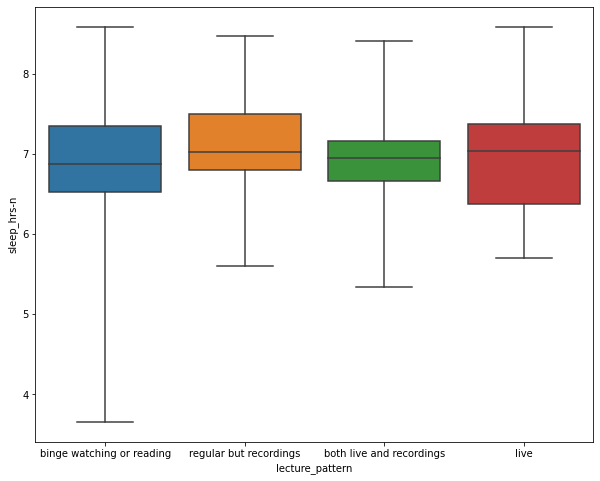

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="lecture_pattern",
                y="sleep_hrs-n", data=df,
                order =  ["binge watching or reading", "regular but recordings", "both live and recordings","live"]
                , fliersize=4, whis=15)

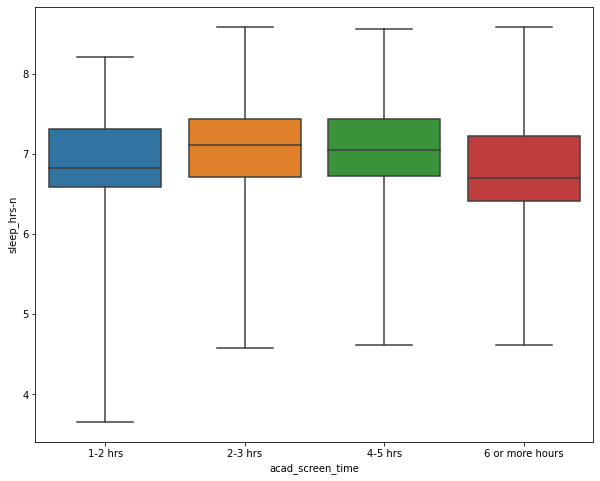

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="acad_screen_time",
                 y="sleep_hrs-n", data=df,
                order = ['1-2 hrs', '2-3 hrs', '4-5 hrs', '6 or more hours']
                , fliersize=4, whis=15)

In [ ]:
dfx = pd.DataFrame(df)
# df2['sleep_hrs'].replace([7,8,5,6,4,3], [1,1,1,1,1,1], regex=True, inplace=True)
# index=
dfx['students'] = pd.DataFrame(np.ones(127, dtype=int))
fig = px.bar(dfx, x="lecture_pattern", y="students", color="assgn_pattern")
fig.show()

In [ ]:
fig = px.bar(df, x="sleep_hrs", y="students", color="lecture_pattern")
fig.show()

In [ ]:
fig = px.bar(df, x="sleep_hrs", y="students", color="assgn_pattern")
fig.show()

In [ ]:
# fig = px.bar(df, x='acad_screen_time', y="students", color="sleep_hrs")
# fig.show()

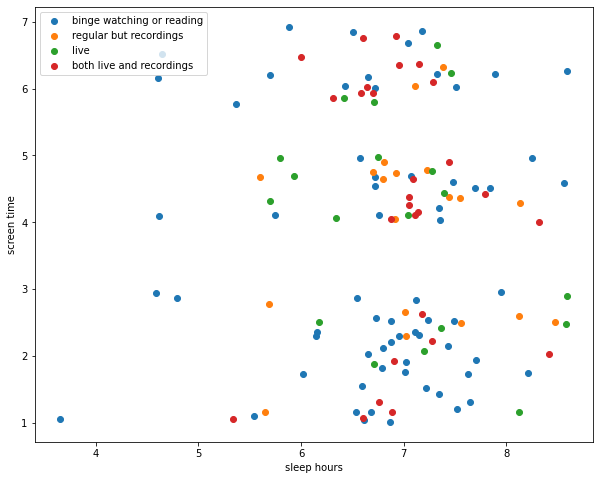

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df0['sleep_hrs-n'], df0['acad_screen_time-nr'], label='binge watching or reading') 
plt.scatter(df1['sleep_hrs-n'], df1['acad_screen_time-nr'], label='regular but recordings') 
plt.scatter(df2['sleep_hrs-n'], df2['acad_screen_time-nr'], label='live')
plt.scatter(df3['sleep_hrs-n'], df3['acad_screen_time-nr'], label='both live and recordings')
plt.xlabel('sleep hours')
plt.ylabel('screen time')
plt.legend()
plt.show()